In [1]:
# Required Packages
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import pandas_datareader.data as pdr
from datetime import datetime
import math

# Progress Bar
from IPython.core.display import Image, display
import progressbar

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# sns setting
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})

# plt setting
sns.set_style('whitegrid')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# The Market Analysis for Technology Services Sector


In this article, the **Technology Services Sector data** from [Yahoo! Finance](https://finance.yahoo.com/) is used, and we analyze the current top tech companies' stock prices.

#### Table of contentens

* [Stock Prices Fluctuations](#Stock-Prices-Fluctuations)
* [The Moving Average of the Stocks](#The-Moving-Average-of-the-Stocks)
* [The Daily Return Average of a Stock](#The-Daily-Return-Average-of-a-Stock)
* [The Correlation Between Daily Returns of Different Stocks](#The-Correlation-Between-Daily-Returns-of-Different-Stocks)
* [Predicting Future Behaviors](#Predicting-Future-Behaviors)
    

| Symbol | Name |
|----------|------------------|
| BTC-USD | Bitcoin USD |
| ETH-USD | Ethereum USD |
| XRP-USD | XRP USD |
| USDT-USD | Tether USD |
| BCH-USD | Bitcoin Cash USD |
| LTC-USD | Litecoin USD |
| EOS-USD | EOS USD |
| BNB-USD | Binance Coin USD |
| XLM-USD | Stellar USD |
| TRX-USD | TRON USD |

In [2]:
Stock_list = ['BTC-USD','ETH-USD','XRP-USD','USDT-USD','BCH-USD','LTC-USD','EOS-USD','BNB-USD','XLM-USD','TRX-USD']
Stock_Dic = {'BTC-USD':'Bitcoin USD',
            'ETH-USD':'Ethereum USD',
            'XRP-USD':'XRP USD',
            'USDT-USD':'Tether USD',
            'BCH-USD':'Bitcoin Cash USD',
            'LTC-USD':'Litecoin USD',
            'EOS-USD':'EOS USD',
            'BNB-USD':'Binance Coin USD',
            'XLM-USD':'Stellar USD',
            'TRX-USD':'TRON USD'}

The data is collected from **two years ago** today **until now**.

In [3]:
start, end = [datetime(datetime.today().year-2,datetime.today().month,datetime.today().day), datetime.today()]
start, end

(datetime.datetime(2017, 11, 28, 0, 0),
 datetime.datetime(2019, 11, 28, 8, 12, 59, 240247))

Collecting data from **Yahoo Finance!**, and creating moving averages for **10**, **20** and **60** day periods of time.

In [4]:
def Get_Data(Inp):
    Days = [10, 20, 60]
    Out = pdr.DataReader(Inp, 'yahoo', start, end)
    Out.insert(0, 'Symbol', Inp) 
    for j in Days:
        column_name = "Moving Ave. %s days" % (str(j))
        Out[column_name] = Out['Adj Close'].rolling(window=j, center=False).mean()
    return Out

In [5]:
Data = Get_Data(Stock_list[0])

Counter = 0
Progress_Bar = progressbar.ProgressBar(maxval=len(Stock_list),
                                       widgets=[progressbar.Bar('#', '|', '|'), progressbar.Percentage()])
Progress_Bar.start()
for i in Stock_list[1:]:
    Counter+=1
    Progress_Bar.update(Counter)
    Temp = Get_Data(i)
    Data = pd.concat([Data, Temp])
    del Temp
Progress_Bar.finish()

|#########################################################################|100%


Displaying today's data only:

In [6]:
Today = Data[Data.index == datetime.today().strftime('%Y-%m-%d')].reset_index(drop = True)
Today.style.hide_index()

Consider **Bitcoin USD** for example. We have,

In [7]:
def Disp_Data(Inp):
    Out = Data[Data.Symbol == Inp].drop(columns=['Symbol'])
    return Out

In [8]:
Temp = Disp_Data('BTC-USD')
Temp.describe()

High           Low          Open         Close        Volume  \
count    731.000000    731.000000    731.000000    731.000000  7.310000e+02   
mean    8047.698156   7593.038783   7836.942757   7833.650244  1.106420e+10   
std     3193.028039   2832.541738   3036.383149   3035.409744  7.593682e+09   
min     3275.377930   3191.303467   3236.274658   3236.761719  2.923670e+09   
25%     6294.175049   6050.554932   6180.806396   6179.619385  5.004655e+09   
50%     7754.890137   7409.100098   7632.089844   7621.299805  7.780960e+09   
75%     9797.542969   9281.420410   9581.320312   9552.287598  1.585711e+10   
max    20089.000000  18974.099609  19475.800781  19497.400391  4.510573e+10   

          Adj Close  Moving Ave. 10 days  Moving Ave. 20 days  \
count    731.000000           722.000000           712.000000   
mean    7833.650244          7818.774027          7770.233105   
std     3035.409744          2992.086603          2912.931179   
min     3236.761719          3397.024365          3524.744824   
25%     6179.619385          6240.792468          6191.598248   
50%     7621.299805          7608.485547          7568.236731   
75%     9552.287598          9524.673926          9460.312317   
max    19497.400391         17718.500000         16533.689990   

       Moving Ave. 60 days  
count           672.000000  
mean           7515.216563  
std            2519.496660  
min            3670.185925  
25%            5701.413373  
50%            7017.407227  
75%            9268.326548  
max           14324.121696

In [9]:
Temp.head().dropna(axis = 1)

High           Low          Open         Close  \
Date                                                                 
2017-11-28  10125.700195   9736.299805   9823.429688  10058.799805   
2017-11-29  11517.400391   9601.030273  10077.400391   9888.610352   
2017-11-30  10801.000000   9202.049805   9906.790039  10233.599609   
2017-12-01  11046.700195   9694.650391  10198.599609  10975.599609   
2017-12-02  11320.200195  10905.099609  10978.299805  11074.599609   

                 Volume     Adj Close  
Date                                   
2017-11-28   6348819968  10058.799805  
2017-11-29  11568799744   9888.610352  
2017-11-30   8310689792  10233.599609  
2017-12-01   6783119872  10975.599609  
2017-12-02   5138500096  11074.599609

In [10]:
Temp.tail()

High          Low         Open        Close       Volume  \
Date                                                                          
2019-11-24  7408.577148  7029.289062  7398.633789  7047.916992  30433517289   
2019-11-25  7319.856934  6617.166992  7039.977051  7146.133789  42685231261   
2019-11-26  7320.230469  7098.572266  7145.159180  7218.371094  21129505542   
2019-11-27  7619.693359  6974.174316  7220.880859  7531.663574  23991412764   
2019-11-28  7587.787109  7498.099121  7543.677734  7539.293945  21251213312   

              Adj Close  Moving Ave. 10 days  Moving Ave. 20 days  \
Date                                                                
2019-11-24  7047.916992          7954.846973          8464.161768   
2019-11-25  7146.133789          7820.261133          8354.342090   
2019-11-26  7218.371094          7687.022168          8247.216650   
2019-11-27  7531.663574          7582.390967          8160.421753   
2019-11-28  7539.293945          7505.391748          8097.142407   

            Moving Ave. 60 days  
Date                             
2019-11-24          8471.693514  
2019-11-25          8455.479614  
2019-11-26          8438.255037  
2019-11-27          8426.350846  
2019-11-28          8416.935986

# Stock Prices Fluctuations

Let's plot the stocks adjusted the closing price for all stock data under study.

In [11]:
def get_ylim(Inp, Var):
    Temp = int(np.float(format(Inp[Var].max(), '.0e')))
    Out = Temp + Temp/(Temp/10**(len(str(Temp))-1))/2
    return Out

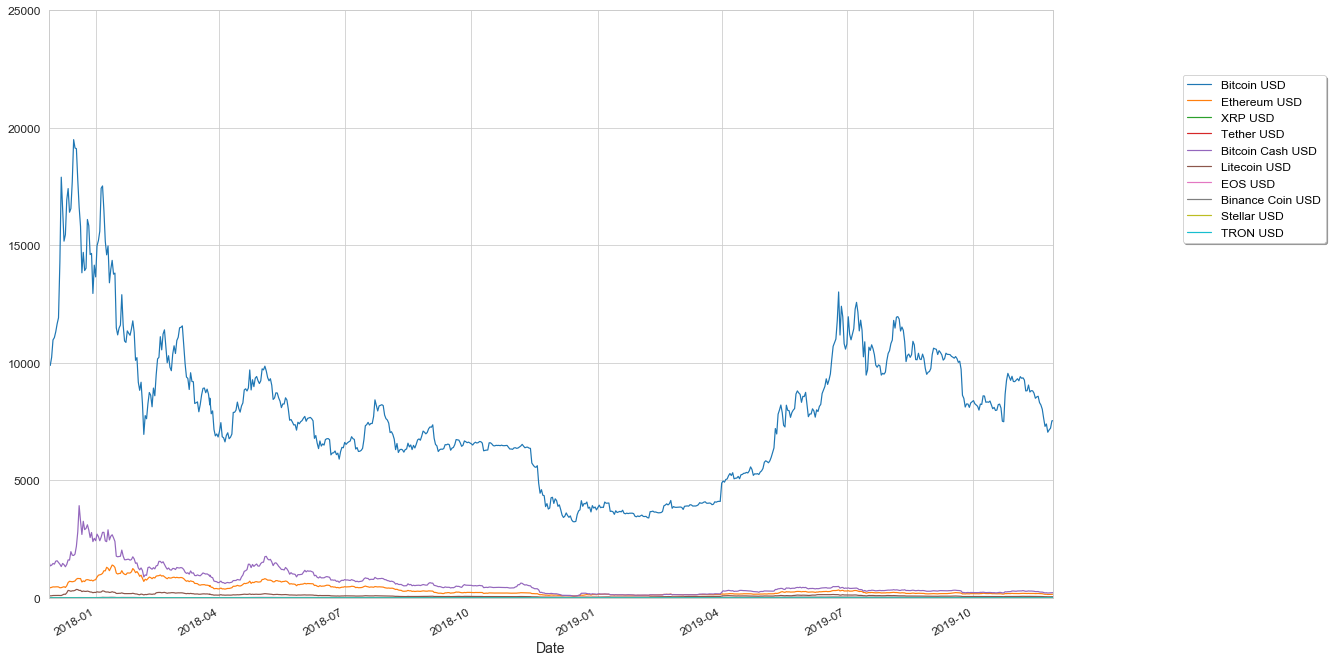

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 12))
for i in range(len(Stock_list)):
    Data[Data.Symbol == Stock_list[i]]['Adj Close'].plot(ax=ax, label=Stock_Dic[Stock_list[i]])
_ = ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.9), shadow=True, ncol=1, fontsize=12)
_ = ax.set_ylim([0, get_ylim(Data, 'Adj Close')])

We can create some new functions that can be beneficial for applications as well.

In [13]:
def List_Search(Inp, key):
    # Inp: A list
    Out=list()
    for i in range(len(Inp)):
        if Inp[i].find(key) != -1:
            Out.append(Inp[i])
    return Out

def List_Diff(Inp_A, Inp_B):
    # Inp_A: A list
    # Inp_B: A list
    Out=list(set(Inp_A)-set(Inp_B))
    return Out

In [14]:
# Creating a new list of Columns
Columns = List_Diff(Data.columns.tolist(), List_Search(Data.columns.tolist(), 'Moving Ave'))
Columns = List_Diff(Columns, ['Symbol'])
Temp = ['Ave ' + i for i in Columns]

# A new DataFrame
Ave_df = pd.DataFrame({'Symbol':Stock_list})
for i in Temp:
    Ave_df[i]=''
del Temp
# Progress Bar    
Counter = 0
Progress_Bar = progressbar.ProgressBar(maxval=len(Stock_list),
                                       widgets=[progressbar.Bar('#', '|', '|'), progressbar.Percentage()])
Progress_Bar.start()
for i in range(len(Stock_list)):
    Counter+=1
    Progress_Bar.update(Counter)
    Ave_df.iloc[i,1:] = Data[Data.Symbol == Stock_list[i]][Columns].mean().values
               
Progress_Bar.finish()

|#########################################################################|100%


In [15]:
Ave_df.style.hide_index()

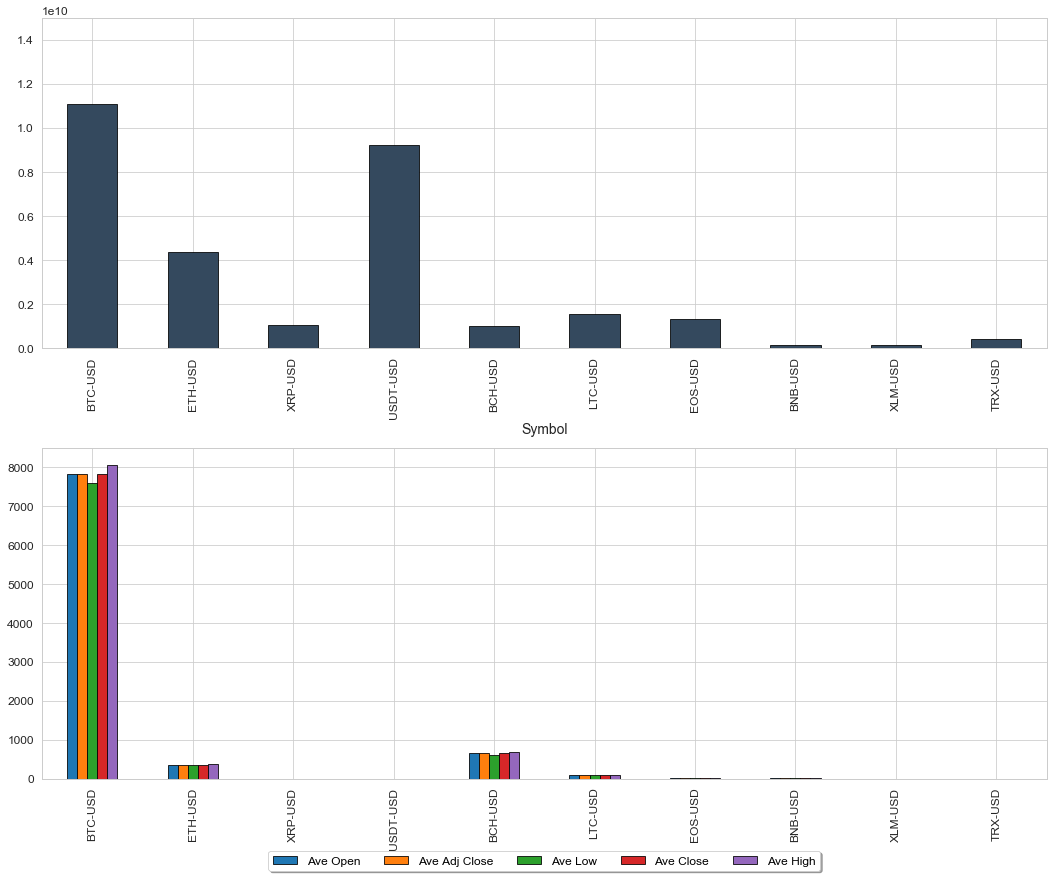

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 14), sharex=False)
# Upper Plot
Ave_df.plot.bar(x='Symbol', y='Ave Volume', rot=90,ax=ax[0], legend=False ,color='#34495e', edgecolor='k')
_ = ax[0].set_ylim([0, get_ylim(Ave_df, 'Ave Volume')])
# Lower Plot
Temp = Ave_df.drop(columns=['Ave Volume'])
Temp.plot.bar(x='Symbol', rot=90,ax=ax[1], legend=True, edgecolor='k')
_ = ax[1].set_ylim([0, get_ylim(Ave_df, 'Ave High')])
_ = ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=len(Temp.columns)-1, fontsize=12)
# Plot setting
plt.subplots_adjust(hspace=0.3,wspace=0.2)

# The Moving Average of the Stocks

Let's plot moving averages for 10, 20 and 60 day periods of time for the top **4** companies with the highest volume on average.

In [17]:
def TopN_volumes(N, df = Ave_df):
    Out = df.sort_values(by='Ave Volume', ascending=False).iloc[:N,0].tolist()
    return Out 

# Conisder the Moving Ave and Adj Close columns
Columns = List_Search(Data.columns.tolist(), 'Moving Ave')
Columns.append("Adj Close")
Columns = list(np.sort(Columns))
# A list of top N = 4 companies with the hightest volume on average.
N = 4
mylist = TopN_volumes(N)

In [18]:
# Conisder the Moving Ave and Adj Close columns
Columns = List_Search(Data.columns.tolist(), 'Moving Ave')
Columns.append("Adj Close")
Columns = list(np.sort(Columns))
# A list of top N = 4 companies with the hightest volume on average.
N = 4
mylist = Ave_df.sort_values(by='Ave Volume', ascending=False).iloc[:N,0].tolist()

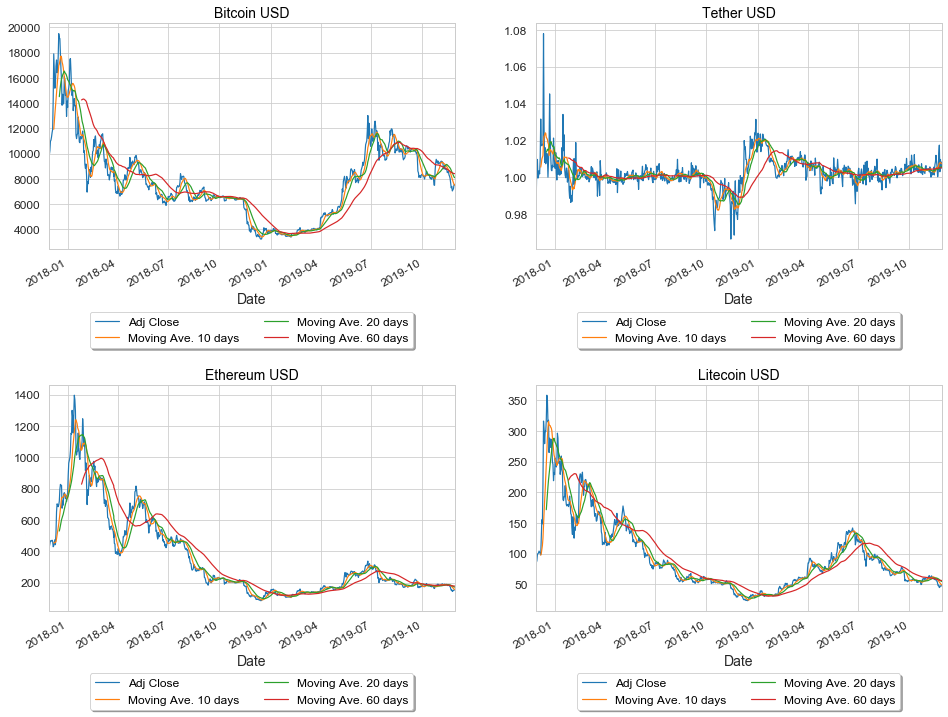

In [19]:
fig, ax = plt.subplots(nrows = math.ceil(N/2), ncols = 2, figsize=(16, 6*math.ceil(N/2)))

Counter = 0
for i in range(math.ceil(N/2)):
    for j in range(2):
        Disp_Data(mylist[Counter])[Columns].plot(ax=ax[i,j], legend = True)
        _ = ax[i,j].set_title(Stock_Dic[mylist[Counter]])
        _ = ax[i,j].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), shadow=True, ncol=2, fontsize=12)
        Counter += 1
plt.subplots_adjust(hspace=0.6, wspace=0.2)

# The Daily Return Average of a Stock

Daily return  can be calculated using the percentage change of the adjusted closing price.

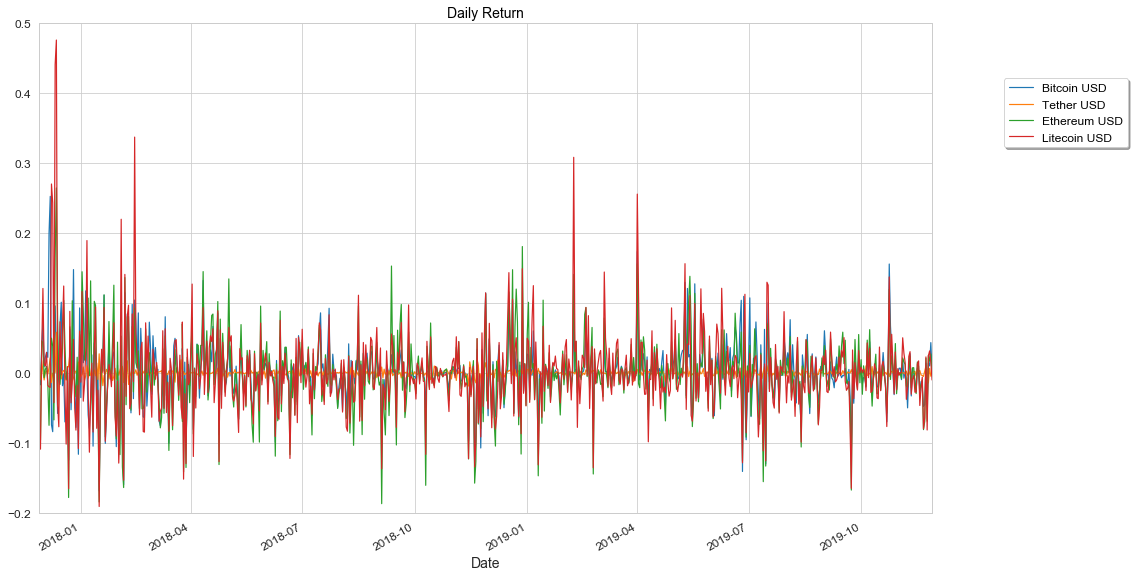

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 10))
for i in range(len(mylist)):
    Disp_Data(mylist[i])['Adj Close'].pct_change().plot(ax=ax, label=Stock_Dic[mylist[i]])
_ = ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.9), shadow=True, ncol=1, fontsize=12)
_ = ax.set_ylim([-0.2 , 0.5])
_ = ax.set_title('Daily Return', fontsize=14)

## The Correlation Between Daily Returns of Different Stocks

First, we need to create a new data frame by reading the **Adj Close** column from all stock data under study. We have,

In [21]:
All_data = pdr.DataReader(Stock_list, 'yahoo', start, end)['Adj Close']

In [22]:
All_data.head()

Symbols          BTC-USD     ETH-USD   XRP-USD  USDT-USD      BCH-USD  \
Date                                                                    
2017-11-28  10058.799805  472.902008  0.299152  1.000140  1546.180054   
2017-11-29   9888.610352  427.523010  0.243064  0.990606  1359.709961   
2017-11-30  10233.599609  447.114014  0.250878  1.008100  1389.780029   
2017-12-01  10975.599609  466.540009  0.255699  1.009780  1462.680054   
2017-12-02  11074.599609  463.449005  0.255492  0.999654  1434.979980   

Symbols        LTC-USD  EOS-USD  BNB-USD   XLM-USD   TRX-USD  
Date                                                          
2017-11-28   96.033798  2.74903  1.91711  0.081415  0.002308  
2017-11-29   85.570999  2.70804  1.75153  0.064424  0.002068  
2017-11-30   88.330704  2.85232  1.99697  0.072871  0.002244  
2017-12-01   99.003700  3.23852  2.07023  0.089883  0.002118  
2017-12-02  100.283997  3.91512  2.08416  0.093816  0.002073

In [23]:
All_data.tail()

Symbols         BTC-USD     ETH-USD   XRP-USD  USDT-USD     BCH-USD  \
Date                                                                  
2019-11-24  7047.916992  142.834702  0.223184  1.017519  205.148804   
2019-11-25  7146.133789  146.476532  0.218622  1.003114  209.235123   
2019-11-26  7218.371094  148.965073  0.222145  1.009773  212.933975   
2019-11-27  7531.663574  153.010559  0.225081  1.005027  220.414047   
2019-11-28  7539.293945  152.942276  0.227130  1.008293  221.009949   

Symbols       LTC-USD   EOS-USD    BNB-USD   XLM-USD   TRX-USD  
Date                                                            
2019-11-24  44.734226  2.450353  15.278765  0.056881  0.013930  
2019-11-25  45.830338  2.535711  15.267364  0.057595  0.014292  
2019-11-26  47.273342  2.632595  15.527255  0.058553  0.015417  
2019-11-27  48.008808  2.688043  16.098288  0.059057  0.016149  
2019-11-28  47.527462  2.678044  15.949790  0.058768  0.016160

The returns can be analyzed using the percentage change from the **adj Close**.

In [24]:
All_returns = All_data.pct_change()

In [25]:
All_returns.tail()

Symbols      BTC-USD   ETH-USD   XRP-USD  USDT-USD   BCH-USD   LTC-USD  \
Date                                                                     
2019-11-24 -0.047295 -0.068982 -0.055058  0.004332 -0.056086 -0.081555   
2019-11-25  0.013936  0.025497 -0.020444 -0.014157  0.019919  0.024503   
2019-11-26  0.010109  0.016989  0.016116  0.006638  0.017678  0.031486   
2019-11-27  0.043402  0.027157  0.013216 -0.004700  0.035129  0.015558   
2019-11-28  0.001013 -0.000446  0.009106  0.003250  0.002704 -0.010026   

Symbols      EOS-USD   BNB-USD   XLM-USD   TRX-USD  
Date                                                
2019-11-24 -0.100593 -0.069474 -0.057688 -0.082321  
2019-11-25  0.034835 -0.000746  0.012550  0.025982  
2019-11-26  0.038208  0.017023  0.016629  0.078667  
2019-11-27  0.021062  0.036776  0.008610  0.047535  
2019-11-28 -0.003720 -0.009224 -0.004900  0.000682

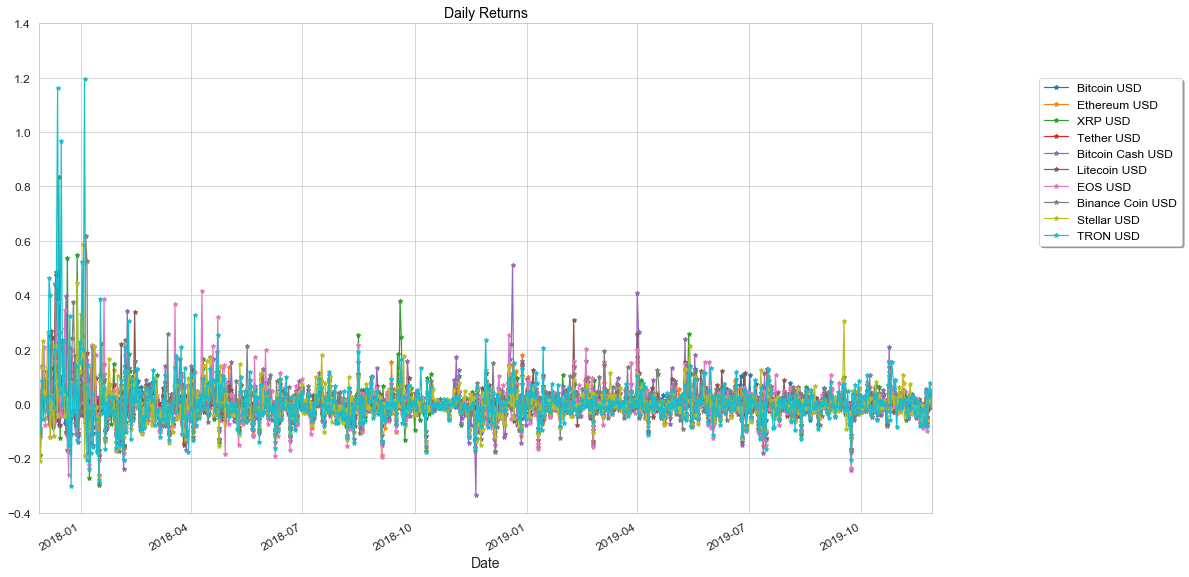

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 10))
All_returns.plot(marker='*', legend=True, ax=ax)
_ = ax.set_ylim([-0.4 , 1.4])
_ = ax.set_title('Daily Returns', fontsize=14)
_ = ax.legend(Stock_Dic.values(), loc='upper center', bbox_to_anchor=(1.2, 0.9), shadow=True, ncol=1, fontsize=12)

The daily returns are neither dominantly positive nor negative. Nevertheless, the highest returns took place around January 2018.

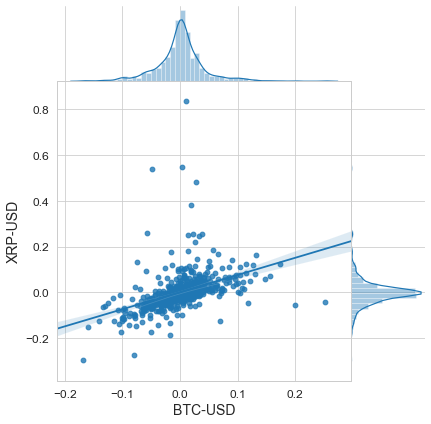

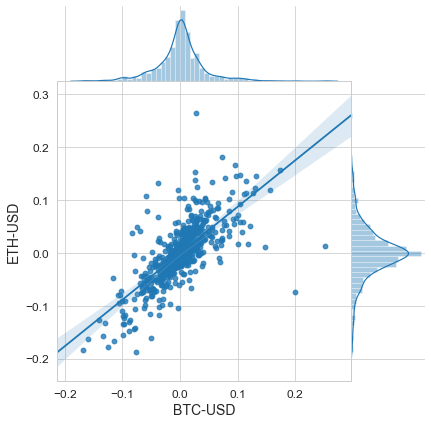

In [27]:
_ = sns.jointplot('BTC-USD','XRP-USD', All_returns, kind='reg', space=0, size=6, ratio=4)
_ = sns.jointplot('BTC-USD','ETH-USD', All_returns, kind='reg', space=0, size=6, ratio=4)

There seems to be a minor positive correlation between every two pairs.

Now, we can use the pairplot tool to visualize all.

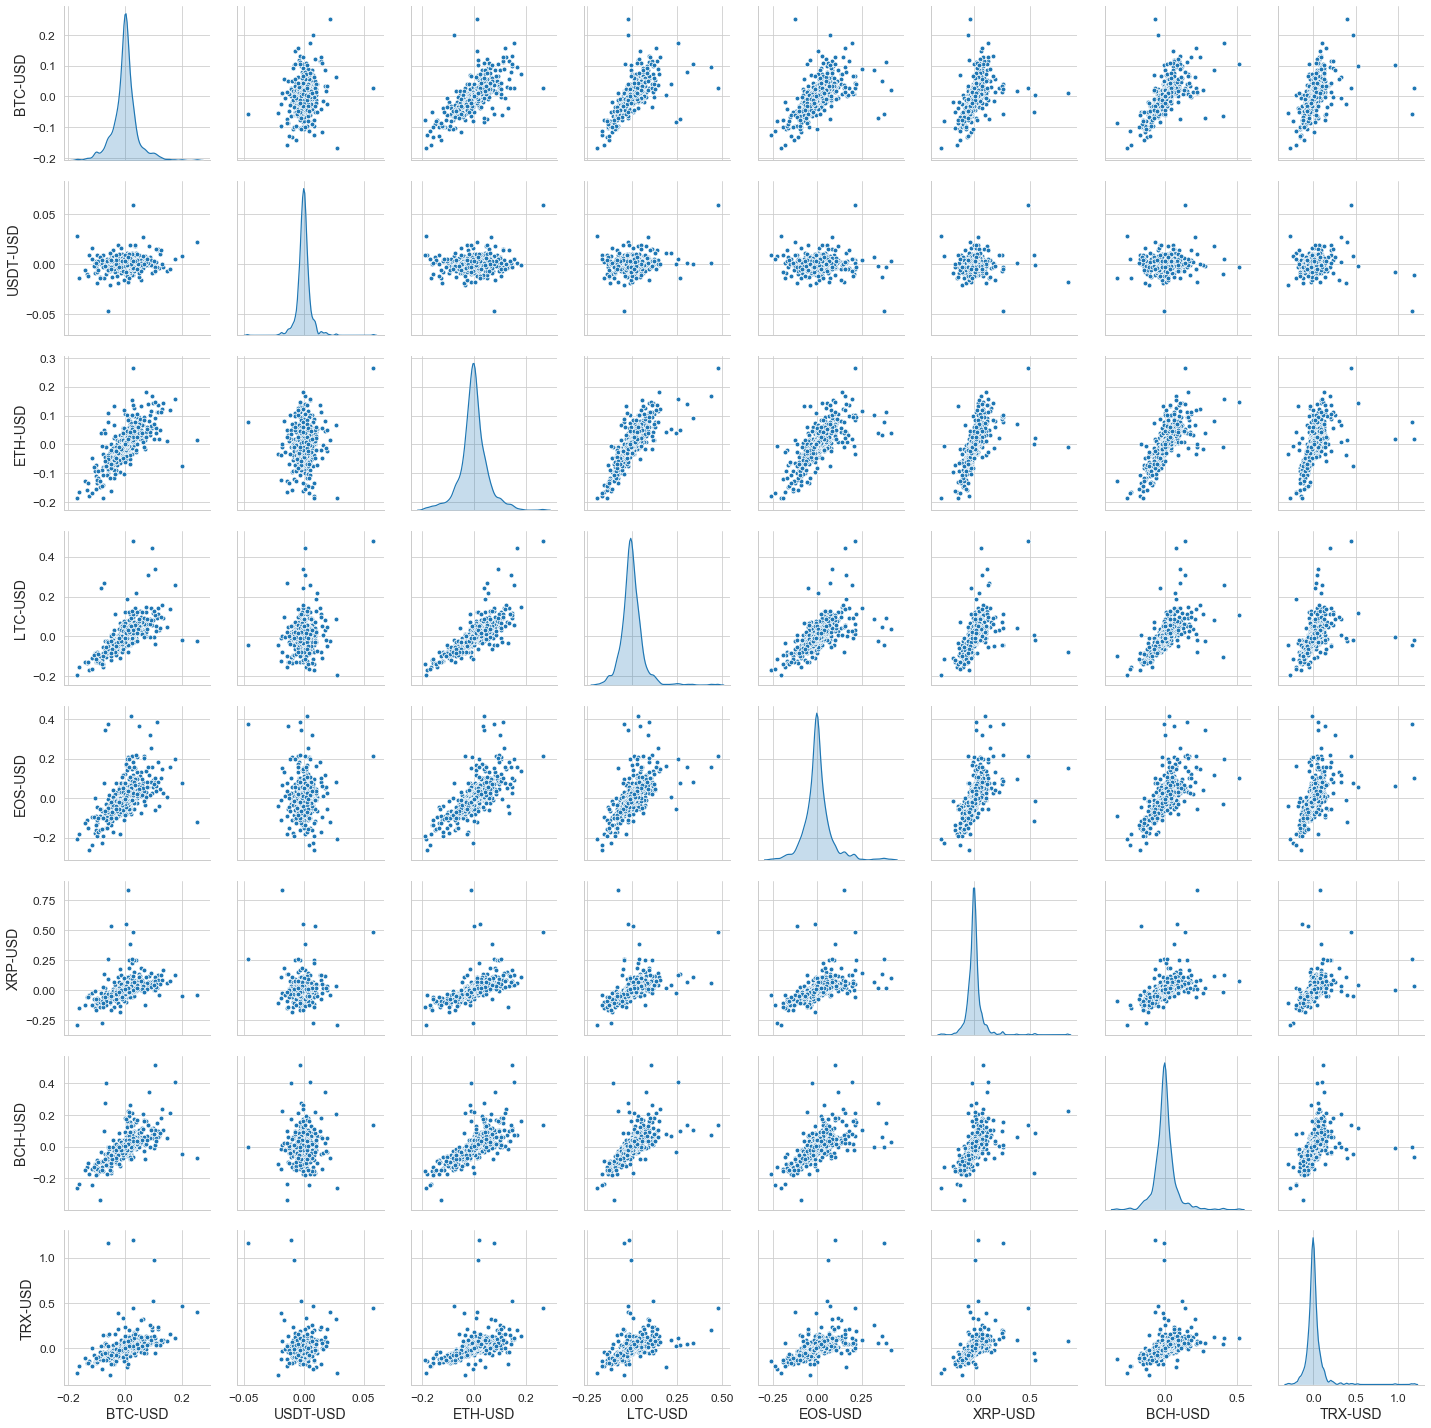

In [28]:
# Remove missing values
Temp = TopN_volumes(8, df = Ave_df)
Temp = All_returns[Temp].dropna()
# plot
_ = sns.pairplot(Temp, diag_kind='kde')

Nonetheless, the correlation matrix and plot are always convenient to see numerical values for correlations.

In [29]:
# Correlation Matrix
Cor_matrix = Temp.corr()
Cor_matrix

Symbols    BTC-USD  USDT-USD   ETH-USD   LTC-USD   EOS-USD   XRP-USD  \
Symbols                                                                
BTC-USD   1.000000  0.164098  0.729216  0.665821  0.597188  0.439136   
USDT-USD  0.164098  1.000000  0.112161  0.176698 -0.033389  0.024524   
ETH-USD   0.729216  0.112161  1.000000  0.801925  0.727286  0.612515   
LTC-USD   0.665821  0.176698  0.801925  1.000000  0.650269  0.515447   
EOS-USD   0.597188 -0.033389  0.727286  0.650269  1.000000  0.553750   
XRP-USD   0.439136  0.024524  0.612515  0.515447  0.553750  1.000000   
BCH-USD   0.652097  0.052991  0.730460  0.662812  0.653818  0.511348   
TRX-USD   0.484773 -0.041612  0.501681  0.412547  0.511659  0.430721   

Symbols    BCH-USD   TRX-USD  
Symbols                       
BTC-USD   0.652097  0.484773  
USDT-USD  0.052991 -0.041612  
ETH-USD   0.730460  0.501681  
LTC-USD   0.662812  0.412547  
EOS-USD   0.653818  0.511659  
XRP-USD   0.511348  0.430721  
BCH-USD   1.000000  0.388209  
TRX-USD   0.388209  1.000000

In [30]:
def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr()
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    Fig, ax = plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, ax=ax, mask=mask, annot=True, square=True, 
                cmap =sns.color_palette("RdBu", n_colors=10), linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": .5})
    bottom, top = ax.get_ylim()
    _ = ax.set_ylim(bottom + 0.5, top - 0.5)

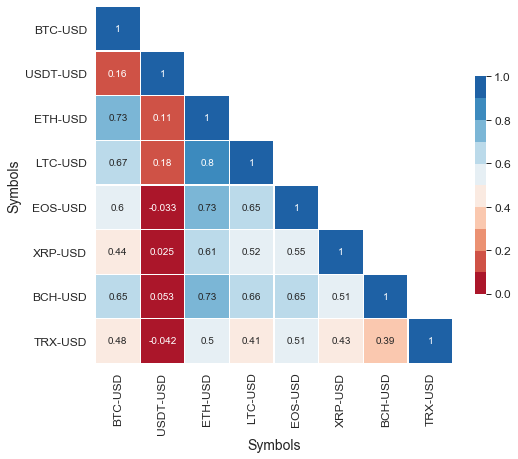

In [31]:
Correlation_Plot (Temp, 8)

Here, darker shades of blue represent a higher correlation.

In [32]:
def Risk_Plot(data):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 6))
    _ = ax.scatter(data.mean(), data.std(), s=25, color = "#e74c3c")
    _ = ax.set_xlabel('Expected Return')
    _ = ax.set_ylabel('Risk')
    #_ = ax.set_xlim([np.float(format(data.mean().min(), '.0e')), np.float(format(data.mean().max(), '.0e'))])
    _ = ax.set_ylim([np.float(format(data.std().min(), '.0e')), np.float(format(data.std().max(), '.0e'))])
    # adding annotatios
    for label,x,y in zip(data.columns, data.mean(), data.std()):
        plt.annotate(label, xy=(x,y), xytext=(-50,0), textcoords = 'offset points',
                     ha = 'right', va = 'bottom', arrowprops=dict(facecolor="#9b59b6", shrink=0.001))

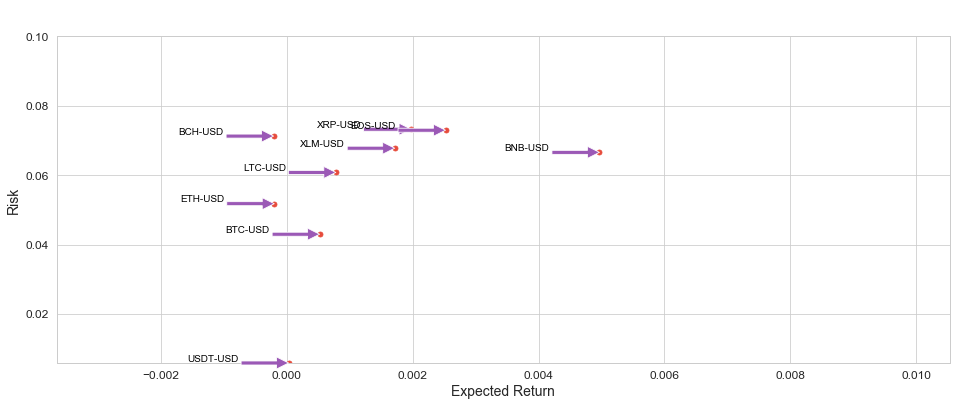

In [33]:
Risk_Plot(All_returns)

The current trend for cryptocurrencies seems to output a value between -0.0005 and 0.005. We would like to identify a crypto with high return and low risk!

In [34]:
qt = All_returns['BTC-USD'].quantile(0.05)

In [35]:
qt_pct = abs(All_returns['BTC-USD'].quantile(0.05))*100
print(qt_pct)

6.8587029255248675


In [36]:
print("""The 0.05 empirical quantile of daily returns is at {0:.2f}.
      This means that with 95% confidence, the worst daily loss will not exceed {0:.2f}% (of the investment)."""
      .format(qt,qt_pct))

The 0.05 empirical quantile of daily returns is at -0.07.
      This means that with 95% confidence, the worst daily loss will not exceed -0.07% (of the investment).


# Predicting Future Behaviors

To predict future behaviors, we can implement the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method) (also see this [link](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-mathematical-foundations/variance-and-standard-deviation) and this [link](https://www.investopedia.com/terms/m/montecarlosimulation.asp)).

In [37]:
# consider a year
days = 365
# Delta t
dt = 1/365

Defining a Monte Carlo function fo the Stock price.

In [38]:
def stock_monte_carlo(start_price, days, mu, sigma):
    '''Function takes in stock price, number of days to run, mean and standard deviation values'''
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):       
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))        
        drift[x] = mu * dt
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
    return price

In [39]:
def Monte_Carlo_Analysis(Inp, mu, sigma, N=1e2, days = days):
    # get the data for Inp teach
    df = Disp_Data(Inp)
    # set the last entry of the open column as the starting price
    start_price = df['Open'][-1]
    # Ouput Figure
    N = int(N)
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 8))
    for run in range(100):
        _ = plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
        _ = ax.set_xlabel('Days')
        _ = ax.set_ylabel('Price')
        _ = ax.set_title('Monte Carlo Analysis for %s' % Stock_Dic[Inp])
    _ = ax.set_xlim([0,days])
    return df

In [40]:
def Final_price_distribution_simulations(Inp, mu, sigma, N= 1e4, days = days):
    # get the data for Inp teach
    df = Disp_Data(Inp)
    # set the last entry of the open column as the starting price
    start_price = df['Open'][-1]
    # Simulations array
    N = int(N)
    simulations = np.zeros(N)
    # Progress Bar    
    Counter = 0
    Progress_Bar = progressbar.ProgressBar(maxval= N, widgets=[progressbar.Bar('#', '|', '|'), progressbar.Percentage()])
    Progress_Bar.start()

    for i in range(N):
        simulations[i] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
        Counter+=1
        Progress_Bar.update(Counter)
    Progress_Bar.finish()
    return simulations

In [41]:
def Final_price_distribution_plot(simulations, Inp):
    # get the data for Inp teach
    df = Disp_Data(Inp)
    # set the last entry of the open column as the starting price
    start_price = df['Open'][-1]
    # Output Figure
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 8))
    q = np.percentile(simulations, 1)
    _ = ax.hist(simulations, bins='auto', color = '#34495e')
    _ = plt.figtext(0.75, 0.80, s="Start price: $%.2f" % start_price, fontsize = 12)
    _ = plt.figtext(0.75, 0.75, "Mean final price: $%.2f" % simulations.mean(), fontsize = 12)
    _ = plt.figtext(0.75, 0.70, "VaR(0.99): $%.2f" % (start_price -q,), fontsize = 12)
    _ = plt.figtext(0.15,0.665, "q(0.99): $%.2f" % q, fontsize = 12)
    _ = ax.set_xlim()
    _ = ax.axvline(x=q, linewidth=4, color='#e74c3c')
    _ = ax.set_title("Final price distribution for %s after %s days" % (Stock_Dic[Inp], days), weight='bold')

### Bitcoin USD

High           Low          Open         Close  \
Date                                                                 
2017-11-28  10125.700195   9736.299805   9823.429688  10058.799805   
2017-11-29  11517.400391   9601.030273  10077.400391   9888.610352   
2017-11-30  10801.000000   9202.049805   9906.790039  10233.599609   
2017-12-01  11046.700195   9694.650391  10198.599609  10975.599609   
2017-12-02  11320.200195  10905.099609  10978.299805  11074.599609   
...                  ...           ...           ...           ...   
2019-11-24   7408.577148   7029.289062   7398.633789   7047.916992   
2019-11-25   7319.856934   6617.166992   7039.977051   7146.133789   
2019-11-26   7320.230469   7098.572266   7145.159180   7218.371094   
2019-11-27   7619.693359   6974.174316   7220.880859   7531.663574   
2019-11-28   7587.787109   7498.099121   7543.677734   7539.293945   

                 Volume     Adj Close  Moving Ave. 10 days  \
Date                                                         
2017-11-28   6348819968  10058.799805                  NaN   
2017-11-29  11568799744   9888.610352                  NaN   
2017-11-30   8310689792  10233.599609                  NaN   
2017-12-01   6783119872  10975.599609                  NaN   
2017-12-02   5138500096  11074.599609                  NaN   
...                 ...           ...                  ...   
2019-11-24  30433517289   7047.916992          7954.846973   
2019-11-25  42685231261   7146.133789          7820.261133   
2019-11-26  21129505542   7218.371094          7687.022168   
2019-11-27  23991412764   7531.663574          7582.390967   
2019-11-28  21251213312   7539.293945          7505.391748   

            Moving Ave. 20 days  Moving Ave. 60 days  
Date                                                  
2017-11-28                  NaN                  NaN  
2017-11-29                  NaN                  NaN  
2017-11-30                  NaN                  NaN  
2017-12-01                  NaN                  NaN  
2017-12-02                  NaN                  NaN  
...                         ...                  ...  
2019-11-24          8464.161768          8471.693514  
2019-11-25          8354.342090          8455.479614  
2019-11-26          8247.216650          8438.255037  
2019-11-27          8160.421753          8426.350846  
2019-11-28          8097.142407          8416.935986  

[731 rows x 9 columns]

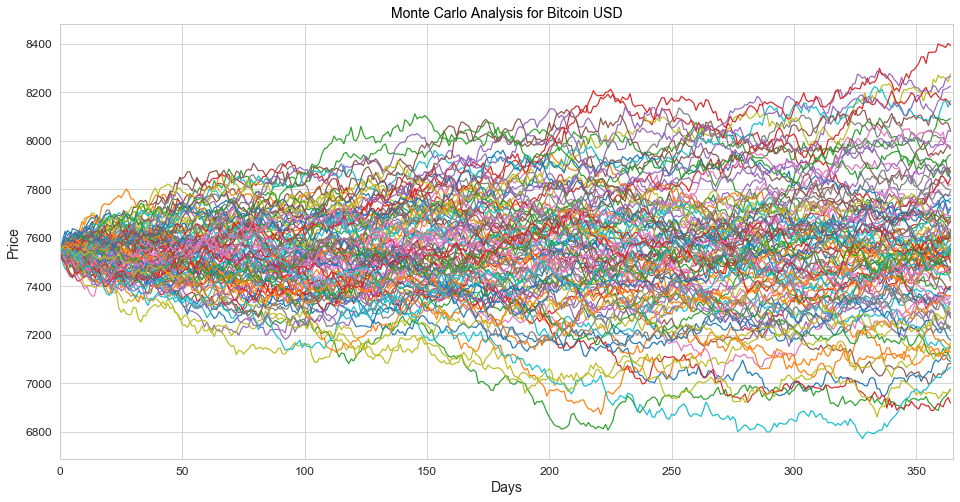

In [42]:
Stock = 'BTC-USD'
# mean
mu = All_returns.mean()[Stock]
# standard deviation
sigma = All_returns.std()[Stock]
# Analysis
Monte_Carlo_Analysis(Stock, mu = mu, sigma = sigma)

In [43]:
Simulations = Final_price_distribution_simulations(Stock,  mu = mu, sigma = sigma)

|#########################################################################|100%


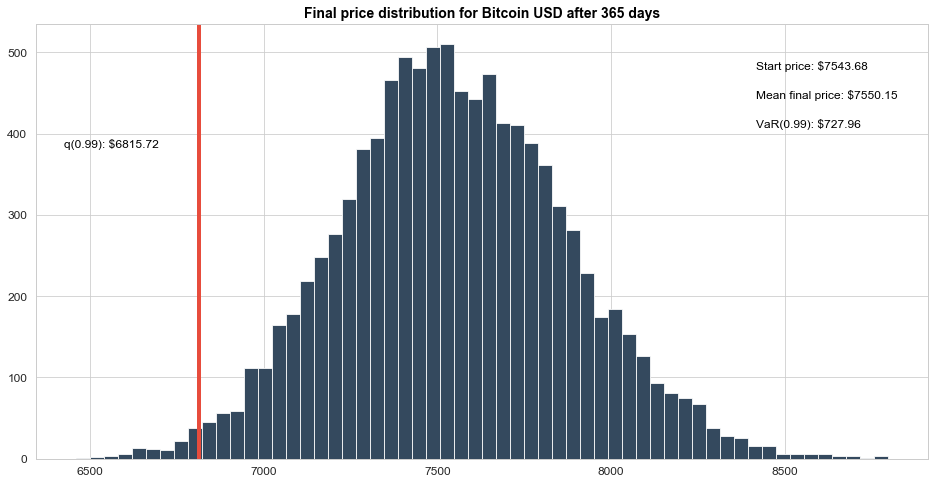

In [44]:
Final_price_distribution_plot(Simulations, Stock)

It seems that Bitcoin USD's overall price is plateau although its expected return is higher than the rest of cryptocurrencies.

***